<a href="https://colab.research.google.com/github/nikensfra/Statistika-Multivariat/blob/main/MANOVA_Niken_Safira_11220940000073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS MANOVA TERHADAP PERBEDAAN KARAKTERISTIK MORFOLOGI BUNGA BERDASARJAN SPESIES IRIS**

In [7]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from pingouin import multivariate_normality
from tabulate import tabulate

## **GENERATE RANDOM DATA**

In [19]:
import pandas as pd
import numpy as np

# Set seed agar hasilnya konsisten
np.random.seed(42)

# Jumlah sampel per spesies
n = 100

# Spesies bunga
species = ['Setosa', 'Versicolor', 'Virginica']

# Mean dan covariance matrix untuk setiap spesies
means = {
    'Setosa': [5.0, 3.5, 1.5, 0.2],
    'Versicolor': [6.0, 2.8, 4.5, 1.3],
    'Virginica': [6.5, 3.0, 5.5, 2.0]
}

# Covariance matrix (homogen)
covariance_matrix = np.array([
    [0.09, 0.01, 0.01, 0.01],
    [0.01, 0.09, 0.01, 0.01],
    [0.01, 0.01, 0.04, 0.01],
    [0.01, 0.01, 0.01, 0.04]
])

data = {
    'species': np.repeat(species, n),
    'sepal_length': np.concatenate([
        np.random.multivariate_normal(means['Setosa'], covariance_matrix, n),
        np.random.multivariate_normal(means['Versicolor'], covariance_matrix, n),
        np.random.multivariate_normal(means['Virginica'], covariance_matrix, n)
    ])[:, 0],
    'sepal_width': np.concatenate([
        np.random.multivariate_normal(means['Setosa'], covariance_matrix, n),
        np.random.multivariate_normal(means['Versicolor'], covariance_matrix, n),
        np.random.multivariate_normal(means['Virginica'], covariance_matrix, n)
    ])[:, 1],
    'petal_length': np.concatenate([
        np.random.multivariate_normal(means['Setosa'], covariance_matrix, n),
        np.random.multivariate_normal(means['Versicolor'], covariance_matrix, n),
        np.random.multivariate_normal(means['Virginica'], covariance_matrix, n)
    ])[:, 2],
    'petal_width': np.concatenate([
        np.random.multivariate_normal(means['Setosa'], covariance_matrix, n),
        np.random.multivariate_normal(means['Versicolor'], covariance_matrix, n),
        np.random.multivariate_normal(means['Virginica'], covariance_matrix, n)
    ])[:, 3],
}

df = pd.DataFrame(data)

print(df.head())


  species  sepal_length  sepal_width  petal_length  petal_width
0  Setosa      4.895355     3.564482      1.664159    -0.020396
1  Setosa      5.080916     3.447152      1.450028     0.380513
2  Setosa      5.188500     3.395882      1.136248     0.312267
3  Setosa      4.480825     3.463515      1.411918     0.207839
4  Setosa      5.239865     3.550673      1.566186     0.219771


In [12]:
#Simpan Data
df.to_csv('iris.csv', index=False)

In [20]:
# Cek tipe data setiap kolom
df.dtypes

,0
species,object
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64


In [13]:
print(df.columns)

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')


## **UJI NORMALITAS MULTIVARIAT**

In [14]:
# Pisahkan data berdasarkan spesies
groups = df['species'].unique()
results = []

# Lakukan uji HZ untuk setiap kelompok spesies
for species in groups:
    subset = df[df['species'] == species]
    numeric_data = subset.select_dtypes(include=['float64', 'int64'])
    hz_result = multivariate_normality(numeric_data, alpha=0.05)
    results.append([
        species,
        f"{hz_result.hz:.4f}",
        f"{hz_result.pval:.4f}",
        "Ya" if hz_result.normal else "Tidak"
    ])

# Header tabel
headers = ["Spesies", "Statistik HZ", "p-value", "Normal?"]

# Tampilkan hasil dalam bentuk tabel
print(tabulate(results, headers=headers, tablefmt="grid", stralign="center"))

+------------+----------------+-----------+-----------+
|  Spesies   |   Statistik HZ |   p-value |  Normal?  |
+============+================+===========+===========+
|   Setosa   |         0.8592 |    0.2998 |    Ya     |
+------------+----------------+-----------+-----------+
| Versicolor |         0.7761 |    0.6151 |    Ya     |
+------------+----------------+-----------+-----------+
| Virginica  |         0.9497 |    0.092  |    Ya     |
+------------+----------------+-----------+-----------+


Berdasarkan hasil Uji Multivariat menunjukan bahwa data sudah berdistribusi normal multuvariat

## **UJI HOMOGENITAS (UJI BOX'S M)**

In [15]:
#Uji Homogenitas
pg.box_m(df, dvs=['sepal_length', 'sepal_width', 'petal_length',
       'petal_width'], group ='species')

,Chi2,df,pval,equal_cov
box,18.948942,20.0,0.525147,True


Uji Box'M menunjukan bahwa data sudah homogen

Karena data sudah mememuhi kriteria untuk MANOVA yaitu


*   Berdistribusi normal multivariat
*   Homogen

Maka kita dapat lanjut membuat model MANOVA nya dan melanjutkan analisis

## **MANOVA**

In [22]:
# Perform MANOVA
manova_model = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=df)
manova_results = manova_model.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0075 4.0000 294.0000 9756.4174 0.0000
         Pillai's trace   0.9925 4.0000 294.0000 9756.4174 0.0000
 Hotelling-Lawley trace 132.7404 4.0000 294.0000 9756.4174 0.0000
    Roy's greatest root 132.7404 4.0000 294.0000 9756.4174 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         species          Value  Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
           Wilks' lambda  0.0066 8.0000 588.0000  830.6651 0.0000
          Pillai's trace  1.37

Dari hasil analisis menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik dalam karakteristik morfologis antara spesies iris yang diteliti.

## **UJI POST HOC**

In [34]:
tukey_SL = pg.pairwise_tukey(data=df, dv='sepal_length', between='species')
print("Tukey Post-hoc untuk variabel Sepal Lenght")
tukey_SL


Tukey Post-hoc untuk variabel Sepal Lenght


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Setosa,Versicolor,5.009982,6.016374,-1.006391,0.043375,-23.202362,1.143530e-14,-3.383896
1,Setosa,Virginica,5.009982,6.461977,-1.451995,0.043375,-33.475751,1.143530e-14,-4.800702
2,Versicolor,Virginica,6.016374,6.461977,-0.445603,0.043375,-10.273389,1.143530e-14,-1.378936


Terdapat perbedaan signifikan dalam panjang sepal antara ketiga spesies:
Setosa memiliki sepal panjang yang secara signifikan lebih pendek dibandingkan dengan Versicolor dan Virginica.
Versicolor juga lebih pendek dibandingkan dengan Virginica, tetapi perbedaannya tidak sebesar perbandingan sebelumnya.  

In [25]:
tukey_SW = pg.pairwise_tukey(data=df, dv='sepal_width', between='species')
print("Tukey Post-hoc untuk variabel Sepal Widht")
tukey_SW

Tukey Post-hoc untuk variabel Sepal Widht


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Setosa,Versicolor,3.473568,2.768366,0.705201,0.041659,16.927933,1.143530e-14,2.324261
1,Setosa,Virginica,3.473568,2.993884,0.479684,0.041659,11.514523,1.143530e-14,1.633986
2,Versicolor,Virginica,2.768366,2.993884,-0.225517,0.041659,-5.413410,3.821232e-07,-0.777791


Terdapat perbedaan yang signifikan dalam lebar sepal antar spesies bunga iris yang dianalisis. Setosa memiliki lebar sepal tertinggi, diikuti oleh Virginica dan Versicolor.
Semua perbandingan yang dianalisis menunjukkan perbedaan yang signifikan dan relevansi statistik.

In [26]:
tukey_PL = pg.pairwise_tukey(data=df, dv='petal_length', between='species')
print("Tukey Post-hoc untuk variabel Petal Length")
tukey_PL

Tukey Post-hoc untuk variabel Petal Length


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Setosa,Versicolor,1.479659,4.522364,-3.042705,0.028593,-106.415005,1.143530e-14,-15.181371
1,Setosa,Virginica,1.479659,5.468345,-3.988686,0.028593,-139.499572,1.143530e-14,-19.613813
2,Versicolor,Virginica,4.522364,5.468345,-0.945981,0.028593,-33.084566,1.143530e-14,-4.613577


Terdapat perbedaan panjang kelopak antara semua pasangan spesies adalah signifikan.Setosa memiliki panjang kelopak yang secara signifikan lebih pendek dibandingkan Versicolor dan Virginica. Versicolor juga lebih pendek dibandingkan Virginica meskipun selisihnya lebih kecil.

In [27]:
tukey_PW = pg.pairwise_tukey(data=df, dv='petal_width', between='species')
print("Tukey Post-hoc untuk variabel Petal Width")
tukey_PW

Tukey Post-hoc untuk variabel Petal Width


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Setosa,Versicolor,0.194675,1.305952,-1.111277,0.028538,-38.93969,1.143530e-14,-5.307315
1,Setosa,Virginica,0.194675,2.018423,-1.823749,0.028538,-63.90505,1.143530e-14,-9.358707
2,Versicolor,Virginica,1.305952,2.018423,-0.712472,0.028538,-24.96536,1.143530e-14,-3.506667


Terdapat perbedaan signifikan dalam lebar kelopak antara semua spesies yang dibandingkan.
Setosa memiliki rata-rata lebar kelopak yang jauh lebih kecil dibandingkan Versicolor dan Virginica.
Hasil ini menunjukkan bahwa ukuran morfologis bunga iris bervariasi sesuai dengan spesies.

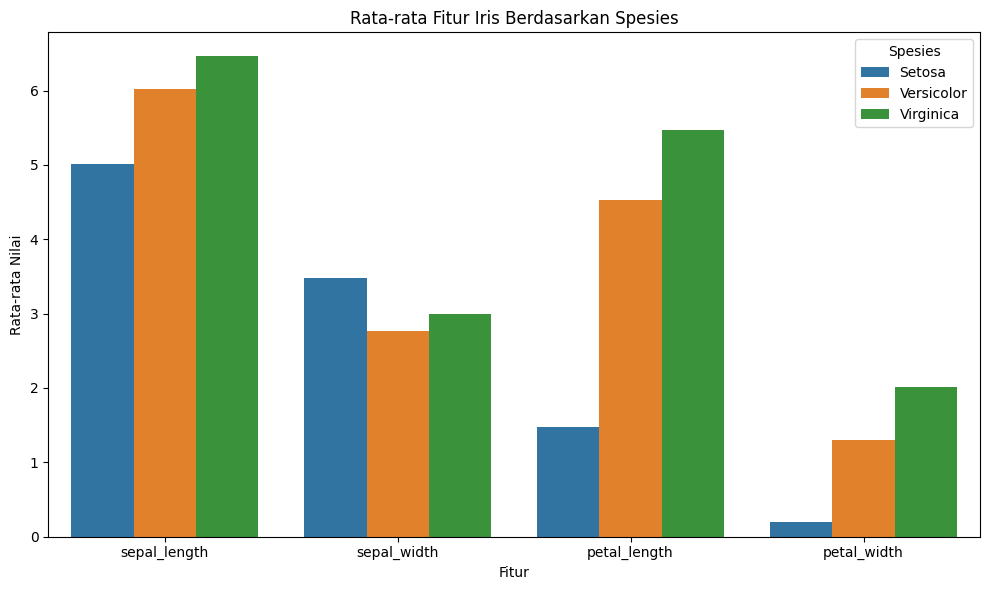

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung rata-rata tiap fitur berdasarkan spesies
mean_values = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean().reset_index()

# Ubah ke format long
mean_values_long = mean_values.melt(id_vars='species', var_name='feature', value_name='mean_value')

# Buat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_long, x='feature', y='mean_value', hue='species')
plt.title('Rata-rata Fitur Iris Berdasarkan Spesies')
plt.xlabel('Fitur')
plt.ylabel('Rata-rata Nilai')
plt.legend(title='Spesies')
plt.tight_layout()
plt.show()


## **KESIMPULAN**

Terdapat perbedaan yang signifikan antara spesies Iris yang ditunjukkan oleh rata-rata  sepal dan petal.
Setosa cenderung memiliki ukuran sepal yang lebih kecil dan petal yang lebih kecil juga, dibandingkan dengan Versicolor dan Virginica.
Virginica biasanya memiliki ukuran petal yang paling besar diantara ketiga spesies, sementara Versicolor memiliki ukuran di antara keduanya.   